In [1]:
import torch 
from torch import nn

from PIL import Image
from torch.utils.data import Dataset

In [2]:
print(torch.__version__)

2.5.1+cu121


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [4]:
from pathlib import Path

data_root = Path("food-101")
print(data_root.exists())
print((data_root / "images").exists())
print((data_root / "meta").exists())

True
True
True


In [7]:
class Food101Dataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = Path(root_dir)
        self.image_dir = self.root_dir / "images"

        self.samples = []
        for class_dir in self.image_dir.iterdir():
            if class_dir.is_dir():
                for img_path in class_dir.glob("*.jpg"):
                    self.samples.append((img_path, class_dir.name))

        self.class_to_idx = {
            cls: idx for idx, cls in enumerate(sorted({c for _, c in self.samples}))
        }

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, class_name = self.samples[idx]
        image = Image.open(img_path).convert("RGB")
        label = self.class_to_idx[class_name]
        return image, label

In [8]:
data = Food101Dataset("food-101")
print(len(data))

101000


<class 'PIL.Image.Image'> 0


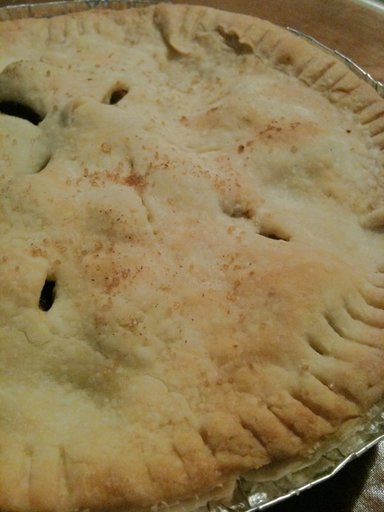

In [14]:
img, label = data[2]
print(type(img), label)
img